In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim
from match_elements.matching import image_similarity
import matplotlib.pyplot as plt
import detect_compo.lib_ip.ip_preprocessing as pre

In [2]:
# ***********************************
# ****** Test Image Similarity ******
# ***********************************

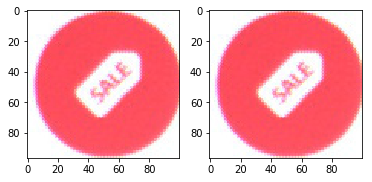

In [3]:
img1 = cv2.imread('data/output/clip/android/a11c.jpg')
img2 = cv2.imread('data/output/clip/ios/i10c.jpg')

plt.subplot(1,2, 1)
plt.imshow(img1)
plt.subplot(1,2, 2)
plt.imshow(img1)

In [4]:
image_similarity(img1, img2, method='dhash')

0.875

In [5]:
image_similarity(img1, img2, method='ssim', is_gray=True)

0.9020413590146766

In [6]:
image_similarity(img1, img2, method='surf', draw_match=False, match_distance_ratio=1.3)

0.5666666666666667

In [7]:
image_similarity(img1, img2, method='sift', draw_match=False, match_distance_ratio=1.3)

0.6086956521739131

In [8]:
image_similarity(img1, img2, method='resnet')

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


0.992896

In [1]:
# ****************************************
# ****** Test Adaptive Binarization ******
# ****************************************

In [13]:
img = cv2.imread('data/input/I203.png') 
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('img',cv2.resize(img, (500,800)))
cv2.imshow('gray',cv2.resize(img_gray, (500,800)))

binary = pre.binarization(img, grad_min=4)
cv2.imshow('bin', cv2.resize(binary, (500,800)))
# thresh,img_bin = cv2.threshold(img_gray,10, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# cv2.imshow('threshold',cv2.resize(img_bin, (500,800)))
# img_ret11 = cv2.adaptiveThreshold(img_gray,  255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,0 ) 
# cv2.imshow('adaptiveThreshold',cv2.resize(img_ret11, (500,800)))
img_ret12 = cv2.adaptiveThreshold(img_gray,  255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,55,0 ) 
cv2.imshow('adaptive2', cv2.resize(img_ret12, (500,800)))


cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
# **************************
# ****** Test Siamese ******
# **************************

In [2]:
from match_elements.SiameseNN import SiameseModel, SiameseData

Using TensorFlow backend.


In [3]:
data = SiameseData()

data.load_data_classification()
data.split_data()

24 classes found in the dataset
X, Y shape (240, 100, 100, 3) (240,)
16 classes for training and 8  classes for testing
X&Y shape of training data : (160, 100, 100, 3) and (160,)
X&Y shape of testing data : (80, 100, 100, 3) and (80,)


In [4]:
siamese_net = SiameseModel()

D:\git_file\github\doing\UIED-Cross-Platform\match_elements\SiameseNN.py:47: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=[<tf.Tenso...)`
  siamese_net = Model(input=[left_input, right_input], output=prediction)


In [5]:
siamese_net.load_model()

Model loaded from: E:/Mulong/Datasets/siamese/siamese.h5


In [6]:
siamese_net.train(100, data)

Epoch: 1 , Loss: 0.6931472
Epoch: 2 , Loss: 0.6931472
Epoch: 3 , Loss: 0.6931472
Epoch: 4 , Loss: 0.6931472
Epoch: 5 , Loss: 0.6931472
Epoch: 6 , Loss: 0.6931472
Epoch: 7 , Loss: 0.6931472
Epoch: 8 , Loss: 0.6931472
Epoch: 9 , Loss: 0.6931472
Epoch: 10 , Loss: 0.6931472
Epoch: 11 , Loss: 0.6931472
Epoch: 12 , Loss: 0.6931472
Epoch: 13 , Loss: 0.6931472
Epoch: 14 , Loss: 0.6931472
Epoch: 15 , Loss: 0.6931472
Epoch: 16 , Loss: 0.6931472
Epoch: 17 , Loss: 0.6931472
Epoch: 18 , Loss: 0.6931472
Epoch: 19 , Loss: 0.6931472
Epoch: 20 , Loss: 0.6931472
Epoch: 21 , Loss: 0.6931472
Epoch: 22 , Loss: 0.6931472
Epoch: 23 , Loss: 0.6931472
Epoch: 24 , Loss: 0.6931472
Epoch: 25 , Loss: 0.6931472
Epoch: 26 , Loss: 0.6931472
Epoch: 27 , Loss: 0.6931472
Epoch: 28 , Loss: 0.6931472
Epoch: 29 , Loss: 0.6931472
Epoch: 30 , Loss: 0.6931472
Epoch: 31 , Loss: 0.6931472
Epoch: 32 , Loss: 0.6931472
Epoch: 33 , Loss: 0.6931472
Epoch: 34 , Loss: 0.6931472
Epoch: 35 , Loss: 0.6931472
Epoch: 36 , Loss: 0.6931472
E

([(1, 0.6931472),
  (2, 0.6931472),
  (3, 0.6931472),
  (4, 0.6931472),
  (5, 0.6931472),
  (6, 0.6931472),
  (7, 0.6931472),
  (8, 0.6931472),
  (9, 0.6931472),
  (10, 0.6931472),
  (11, 0.6931472),
  (12, 0.6931472),
  (13, 0.6931472),
  (14, 0.6931472),
  (15, 0.6931472),
  (16, 0.6931472),
  (17, 0.6931472),
  (18, 0.6931472),
  (19, 0.6931472),
  (20, 0.6931472),
  (21, 0.6931472),
  (22, 0.6931472),
  (23, 0.6931472),
  (24, 0.6931472),
  (25, 0.6931472),
  (26, 0.6931472),
  (27, 0.6931472),
  (28, 0.6931472),
  (29, 0.6931472),
  (30, 0.6931472),
  (31, 0.6931472),
  (32, 0.6931472),
  (33, 0.6931472),
  (34, 0.6931472),
  (35, 0.6931472),
  (36, 0.6931472),
  (37, 0.6931472),
  (38, 0.6931472),
  (39, 0.6931472),
  (40, 0.6931472),
  (41, 0.6931472),
  (42, 0.6931472),
  (43, 0.6931472),
  (44, 0.6931472),
  (45, 0.6931472),
  (46, 0.6931472),
  (47, 0.6931472),
  (48, 0.6931472),
  (49, 0.6931472),
  (50, 0.6931472),
  (51, 0.6931472),
  (52, 0.6931472),
  (53, 0.6931472),
  

In [2]:
# ************************************
# ****** Test Resnet Similarity ******
# ************************************